In [3]:
import footprints.m_to_py as ffp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Example 1: Compute a single footprint and inspect outputs
FFP, flag = ffp.footprint_FFP(
    zm=20, z0=0.01, umean=np.nan, 
    h=2000, ol=-10, sigmav=0.9, ustar=0.5,
    wind_dir=30, r_levels=[10, 50, 80]
)
print("Flag:", flag)  # Expect 0 (no error)
print("Footprint peak at x ~ %.1f m" % FFP.coords['x_ci_max'] if 'x_ci_max' in FFP.attrs else "Peak not directly given")
#print("Contour 80% has %d points" % len(FFP.attrs['contours'][80][0]))  # coordinates of 80% contour

# Example 2: Footprint climatology for a small time series
time_series = {
    "zm": [20, 20, 20], 
    "z0": [0.1, 0.1, 0.1], 
    "umean": [np.nan, np.nan, np.nan],  # use z0 for all
    "h": [1000, 800, 1200], 
    "ol": [-50, 25, -200],            # varying stability 
    "sigmav": [0.8, 0.5, 0.7], 
    "ustar": [0.4, 0.3, 0.35], 
    "wind_dir": [45, 90, 135]        # varying wind directions
}
f_clim, flag_c = ffp.footprint_FFP_climatology(**time_series, r_levels=[80], smooth=True)
print("Climatology included footprints:", f_clim.attrs['n'], "Flag:", flag_c)
# The integrated footprint should be ~1:
total_fraction = float((f_clim * (f_clim.coords['x'][1]-f_clim.coords['x'][0]) * (f_clim.coords['y'][1]-f_clim.coords['y'][0])).sum())
print("Integrated footprint climatology =", total_fraction)


Flag: 0
Peak not directly given
Climatology included footprints: 3 Flag: 0
Integrated footprint climatology = 0.8450540279460822


<Axes: xlabel='x [m]', ylabel='y [m]'>

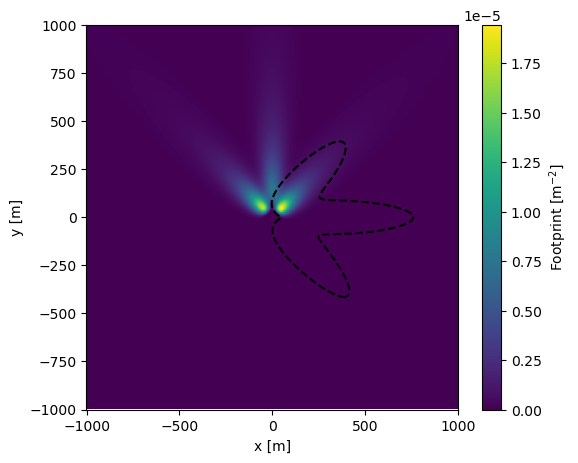

In [6]:
ffp.plot_footprint(
    f_clim,  # climatology object
)

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
X, Y = np.meshgrid(np.linspace(-1,1,50), np.linspace(-1,1,50))
Z = np.exp(-(X**2 + Y**2))
CS = plt.contour(X, Y, Z, levels=[0.4])
print(type(CS), hasattr(CS, 'collections'))    # QuadContourSet, True
